In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
df =pd.read_csv(r'C:/Users/navee/Downloads/Cluster_Hackathon_dump.csv')

In [3]:
df.head()

,App_ID,amount,balance,bank_statement_id,Transaction_Date,Transaction_Details,lender,Bank,File_ID,Has_Password,IFSC,Bank Statements__statement_from,Bank Statements__statement_to
0,7663,-240.0,9769.97,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-10T05:30:00+05:30,APY5759796_102018_501203751878_INSTALLME,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30
1,7663,-1800.0,22586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-29T05:30:00+05:30,UPI-50100188029243-SRINATHAR56@OKHDFCBANK-PAY-...,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30
2,7663,-2000.0,20586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-30T05:30:00+05:30,NWD-652166XXXXXX5428-42390431-MALUR,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30
3,7663,113.0,20699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-30T05:30:00+05:30,CREDIT INTEREST CAPITALISED,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30
4,7663,-10000.0,10699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-01T05:30:00+05:30,NWD-652166XXXXXX5428-42390431-MALUR,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30


In [4]:
df['App_ID'].nunique()

4870

In [ ]:
# generating seperate column for the credit and debit from the amount column.

In [5]:
l=list(df.amount)

In [6]:
l1=[]
l2=[]
for i in l:
    if i<0:
        l1.append(i)
        l2.append(0)
    else:
        l2.append(i)
        l1.append(0)
print(len(l1))
print(len(l2))

200000
200000


In [7]:
df['debit']=l1
df['credit']=l2

In [ ]:
# converting the transaction_date into datetime format so new features can be extracted from it to understand the data better.

In [9]:
df.Transaction_Date.dtype

dtype('O')

In [10]:
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])

In [12]:
df.Transaction_Date

0        2018-10-10 05:30:00+05:30
1        2018-09-29 05:30:00+05:30
2        2018-09-30 05:30:00+05:30
3        2018-09-30 05:30:00+05:30
4        2018-10-01 05:30:00+05:30
                    ...           
199995   2018-12-06 05:30:00+05:30
199996   2018-12-06 05:30:00+05:30
199997   2018-12-06 05:30:00+05:30
199998   2018-12-06 05:30:00+05:30
199999   2018-12-06 05:30:00+05:30
Name: Transaction_Date, Length: 200000, dtype: datetime64[ns, pytz.FixedOffset(330)]

In [ ]:
# extracting the date, month, day, dayname, time features to rollup and rolldown the timeseries to understand the 
# transaction better and clearly.

In [13]:
df['date']=df['Transaction_Date'].dt.date

In [19]:
df['month']=df['Transaction_Date'].dt.month
df['day']=df['Transaction_Date'].dt.weekday

In [35]:
df.head(50)

,App_ID,amount,balance,bank_statement_id,Transaction_Date,Transaction_Details,lender,Bank,File_ID,Has_Password,IFSC,Bank Statements__statement_from,Bank Statements__statement_to,debit,credit,date,month,day,dayname,time
0,7663,-240.00,9769.97,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-10 05:30:00+05:30,APY5759796_102018_501203751878_INSTALLME,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,-240.00,0.0,2018-10-10,10,2,Wednesday,05:30:00
1,7663,-1800.00,22586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-29 05:30:00+05:30,UPI-50100188029243-SRINATHAR56@OKHDFCBANK-PAY-...,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,-1800.00,0.0,2018-09-29,9,5,Saturday,05:30:00
2,7663,-2000.00,20586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-30 05:30:00+05:30,NWD-652166XXXXXX5428-42390431-MALUR,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,-2000.00,0.0,2018-09-30,9,6,Sunday,05:30:00
3,7663,113.00,20699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-30 05:30:00+05:30,CREDIT INTEREST CAPITALISED,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,0.00,113.0,2018-09-30,9,6,Sunday,05:30:00
4,7663,-10000.00,10699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-01 05:30:00+05:30,NWD-652166XXXXXX5428-42390431-MALUR,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,-10000.00,0.0,2018-10-01,10,0,Monday,05:30:00
5,7663,-110.00,10589.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-01 05:30:00+05:30,POS 652166XXXXXX5428 EAZYPAY ICICI BA POS DEBIT,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,-110.00,0.0,2018-10-01,10,0,Monday,05:30:00
6,7663,-100.00,10489.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-01 05:30:00+05:30,POS 652166XXXXXX5428 EAZYPAY ICICI BA POS DEBIT,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,-100.00,0.0,2018-10-01,10,0,Monday,05:30:00
7,7663,-4682.00,5807.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-01 05:30:00+05:30,ACH D- SAMPATHI CREDITS PRI-FLINS4-109-1,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,-4682.00,0.0,2018-10-01,10,0,Monday,05:30:00
8,7663,-23.60,5783.49,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-01 05:30:00+05:30,FEE-ATM CASH(1TXN)27/09/18-AOR1827436015201,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,-23.60,0.0,2018-10-01,10,0,Monday,05:30:00
9,7663,-3630.00,2153.49,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-03 05:30:00+05:30,BAJAJ FINEMI-BF160718_221-166-341591,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,-3630.00,0.0,2018-10-03,10,2,Wednesday,05:30:00


In [23]:
df['dayname']=df['Transaction_Date'].dt.day_name()

In [25]:
df['time']=df['Transaction_Date'].dt.time

In [ ]:
# we can drop the lender column as it contain around 90+ percent of missing value.

In [28]:
df['lender'].isnull().sum()

196178

In [ ]:
# Extract all the type of transaction from the transaction detail column.

In [30]:
l=df['Transaction_Details'].astype(str)

In [37]:
l1=[]
for i in l:
    l1.append(i[0:3])
df['Transaction_type']=l1

In [56]:
l=list(df['Transaction_type'])

In [57]:
l1=[]
for i in l:
    if i=='IMP':
        l1.append('IMPS')
    elif i=='MB:' or i=='MOB' or i=='MB ':
        l1.append('MOB')
    elif i=='NEF':
        l1.append("NEFT")
    elif i=='OPE':
        l1.append('Open Account')
    elif i=='Chr':
        l1.append('Chrg')
    elif i=='ECO':
        l1.append('ECOM')
    elif i=='.IM':
        l1.append('.IMPS')
    elif i=='UPI' or i=="Upi":
        l1.append('UPI')
    else:
        l1.append(i)
df['Transaction_type']=l1

In [77]:
df.Has_Password.value_counts()

True     195972
False      4028
Name: Has_Password, dtype: int64

In [ ]:
# the time peroid between the bank_statement_from and bank_statement_to is required, and it is mostly similar for all transactions(29 to 31 days).

In [79]:
df['Bank Statements__statement_from']=pd.to_datetime(df['Bank Statements__statement_from'])
df['Bank Statements__statement_to']=pd.to_datetime(df['Bank Statements__statement_to'])

In [80]:
df['Bank_statement_from']=df['Bank Statements__statement_from'].dt.date
df['Bank_statement_to']=df['Bank Statements__statement_to'].dt.date

In [81]:
df['Bank_statement_period']=df['Bank_statement_to']-df['Bank_statement_from']

In [ ]:
# dropping these features as there data is already present in small segregated form in other columns that are generated from them using feature engineering.

In [87]:
df.drop(columns=['Transaction_Date','Transaction_Details','lender','Bank Statements__statement_from','Bank Statements__statement_to'],inplace=True)

In [88]:
df.head()

,App_ID,amount,balance,bank_statement_id,Bank,File_ID,Has_Password,IFSC,debit,credit,date,month,day,dayname,time,Transaction_type,Bank_statement_from,Bank_statement_to,Bank_statement_period
0,7663,-240.0,9769.97,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,hdfc,199122,True,HDFC0009061,-240.0,0.0,2018-10-10,10,2,Wednesday,05:30:00,APY,2018-09-29,2018-10-28,29 days
1,7663,-1800.0,22586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,hdfc,199122,True,HDFC0009061,-1800.0,0.0,2018-09-29,9,5,Saturday,05:30:00,UPI,2018-09-29,2018-10-28,29 days
2,7663,-2000.0,20586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,hdfc,199122,True,HDFC0009061,-2000.0,0.0,2018-09-30,9,6,Sunday,05:30:00,NWD,2018-09-29,2018-10-28,29 days
3,7663,113.0,20699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,hdfc,199122,True,HDFC0009061,0.0,113.0,2018-09-30,9,6,Sunday,05:30:00,CRE,2018-09-29,2018-10-28,29 days
4,7663,-10000.0,10699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,hdfc,199122,True,HDFC0009061,-10000.0,0.0,2018-10-01,10,0,Monday,05:30:00,NWD,2018-09-29,2018-10-28,29 days


In [92]:
df.Bank.unique()

array(['hdfc', 'kotak', 'andhra', 'axis', 'dena', 'sbi', 'rbl', 'corp',
       'dcb', 'ubi', 'syndicate', 'bob', 'icici', 'yes', 'equitas',
       'indusind'], dtype=object)

In [109]:
df1=pd.read_csv(r'C://Users/navee/Downloads/IFSC.csv')

In [125]:
l=list(df1.BANK)

In [ ]:
# Merging the data on the basis of the IFSC code.

In [134]:
data=df.merge(df1,how='inner',on=['IFSC'])

In [135]:
l=data.CONTACT.astype(str)

In [ ]:
# droping the column as they are used to create new varible and there information is stored in the segregated form.

In [141]:
data.drop(columns=['BANK','ADDRESS','CONTACT','SWIFT'],inplace=True)

In [142]:
data.head()

,App_ID,amount,balance,bank_statement_id,Bank,File_ID,Has_Password,IFSC,debit,credit,...,BRANCH,CENTRE,DISTRICT,STATE,IMPS,RTGS,CITY,NEFT,MICR,UPI
0,7663,-240.0,9769.97,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,hdfc,199122,True,HDFC0009061,-240.0,0.0,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True
1,7663,-1800.0,22586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,hdfc,199122,True,HDFC0009061,-1800.0,0.0,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True
2,7663,-2000.0,20586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,hdfc,199122,True,HDFC0009061,-2000.0,0.0,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True
3,7663,113.0,20699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,hdfc,199122,True,HDFC0009061,0.0,113.0,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True
4,7663,-10000.0,10699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,hdfc,199122,True,HDFC0009061,-10000.0,0.0,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True


In [158]:
data.columns

Index(['App_ID', 'amount', 'balance', 'bank_statement_id', 'Bank', 'File_ID',
       'Has_Password', 'IFSC', 'debit', 'credit', 'date', 'month', 'day',
       'dayname', 'time', 'Transaction_type', 'Bank_statement_from',
       'Bank_statement_to', 'Bank_statement_period', 'BRANCH', 'CENTRE',
       'DISTRICT', 'STATE', 'IMPS', 'RTGS', 'CITY', 'NEFT', 'MICR', 'UPI'],
      dtype='object')

In [153]:
data.MICR.fillna(data.MICR.mean(),inplace=True)

In [159]:
data.drop(columns=['amount','bank_statement_id'],inplace=True)

In [160]:
data.to_csv('C://Users/navee/Desktop/Bank_data.csv')

In [161]:
data.head()

,App_ID,balance,Bank,File_ID,Has_Password,IFSC,debit,credit,date,month,...,BRANCH,CENTRE,DISTRICT,STATE,IMPS,RTGS,CITY,NEFT,MICR,UPI
0,7663,9769.97,hdfc,199122,True,HDFC0009061,-240.0,0.0,2018-10-10,10,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True
1,7663,22586.09,hdfc,199122,True,HDFC0009061,-1800.0,0.0,2018-09-29,9,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True
2,7663,20586.09,hdfc,199122,True,HDFC0009061,-2000.0,0.0,2018-09-30,9,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True
3,7663,20699.09,hdfc,199122,True,HDFC0009061,0.0,113.0,2018-09-30,9,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True
4,7663,10699.09,hdfc,199122,True,HDFC0009061,-10000.0,0.0,2018-10-01,10,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True


In [ ]:
# Exploratory data analysis (descriptive statistics)

In [162]:
import seaborn as sns

In [170]:
data.columns

Index(['App_ID', 'balance', 'Bank', 'File_ID', 'Has_Password', 'IFSC', 'debit',
       'credit', 'date', 'month', 'day', 'dayname', 'time', 'Transaction_type',
       'Bank_statement_from', 'Bank_statement_to', 'Bank_statement_period',
       'BRANCH', 'CENTRE', 'DISTRICT', 'STATE', 'IMPS', 'RTGS', 'CITY', 'NEFT',
       'MICR', 'UPI'],
      dtype='object')

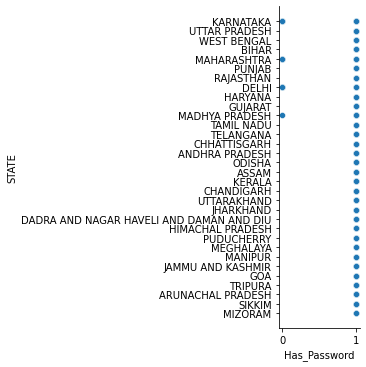

In [174]:
sns.relplot(data=data,y='STATE',x='Has_Password')

In [ ]:
# the plot shows, which state have awareness on using the technology, as todays world is not safe and cyber security is needed.

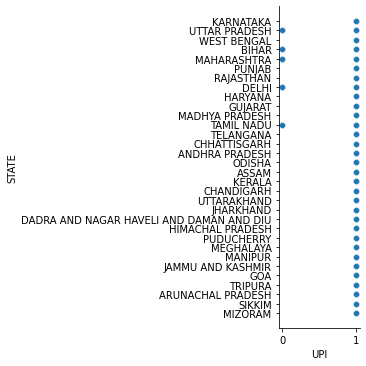

In [176]:
sns.relplot(data=data,y='STATE',x='UPI')

In [ ]:
# Today upi payment is mostly used in all the states but some of the users prefer offline banking rather than online payment.

In [196]:
x=data.groupby('STATE')['App_ID'].count()

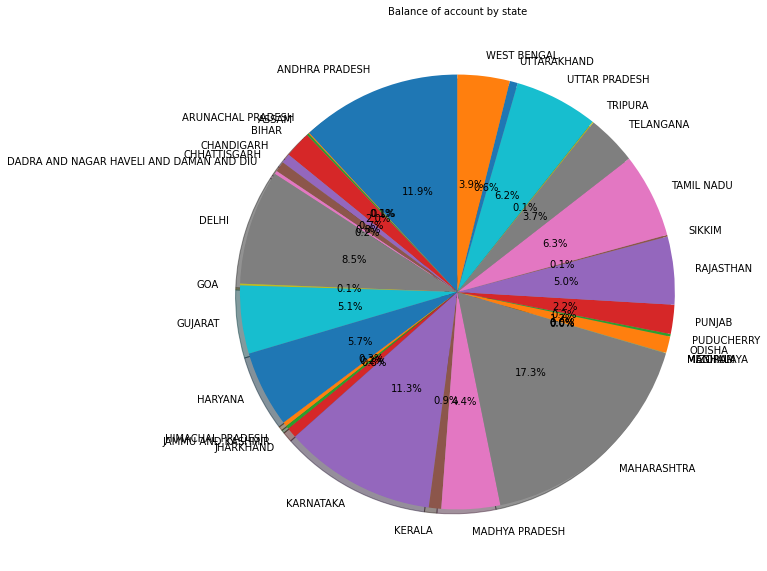

In [197]:
import matplotlib.pyplot as plt
pie, ax = plt.subplots(figsize=[20,10])
labels = x.keys()
plt.pie(x=x, autopct="%.1f%%", labels=labels, pctdistance=0.5,shadow=True, startangle=90)
plt.title("percentage of users based on state", fontsize=10);

In [ ]:
# The piechart is used to show that on the basis of state, percent of users are shown in each state.
# The largest percent of users are from maharastra, followed by karnataka and delhi
# The smallest percent of user are from Goa and sikkim which can be due to the population density of the areas.

In [198]:
x=data.groupby('Bank')['App_ID'].count()

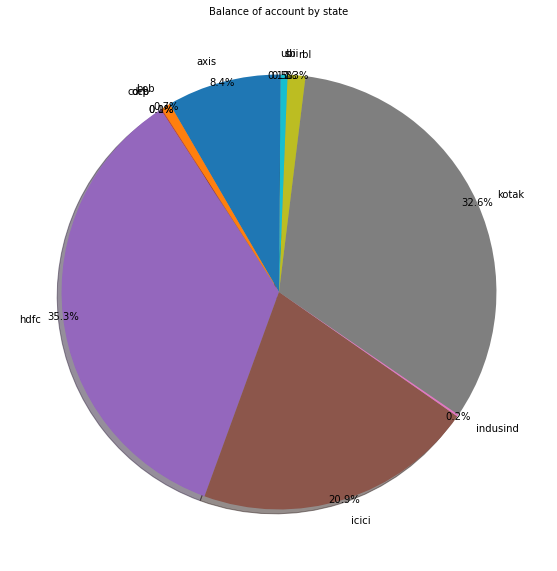

In [201]:
import matplotlib.pyplot as plt
pie, ax = plt.subplots(figsize=[20,10])
labels = x.keys()
plt.pie(x=x, autopct="%.1f%%", labels=labels, pctdistance=1,shadow=True, startangle=90)
plt.title("Balance of account by state", fontsize=10);

In [ ]:
# The piechart shows the percentage distribution of the users on the bank basis.
# The people largly prefer to use the hdfc and kotak bank,with combined percent of 70% approx.
# Very less percent of peope are associated with the corp, bob and rbl banks.

In [ ]:
# Generating the new features such as month, date ,day,and time to understand the debit and credit, flow in detail.

In [212]:
data['date']=pd.to_datetime(data['date'])

In [213]:
data['Month_name']=data['date'].dt.month_name

In [221]:
data.drop(columns=['Month_name'],inplace=True)

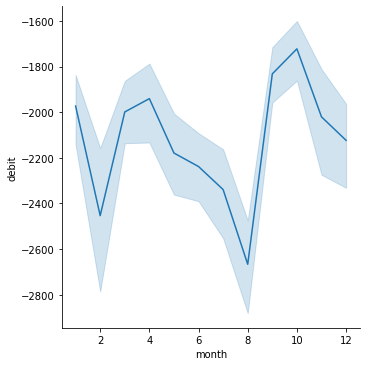

In [227]:
sns.relplot(data=data,x='month',y='debit',kind='line')

<Figure size 1440x720 with 0 Axes>

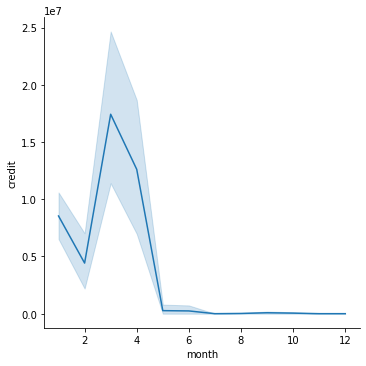

In [233]:
plt.figure(figsize=[20,10])
sns.relplot(data=data,x='month',y='credit',kind='line')

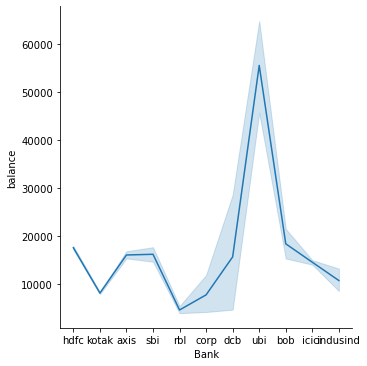

In [235]:
sns.relplot(data=data,x='Bank',y='balance',kind='line')

In [ ]:
# Understanding the balance flow in various bank. This shows that bob,dcb,icici banks have large sum balance in the whole 
# dataset, and minimum balance sum is present in the rbl and corp banks.

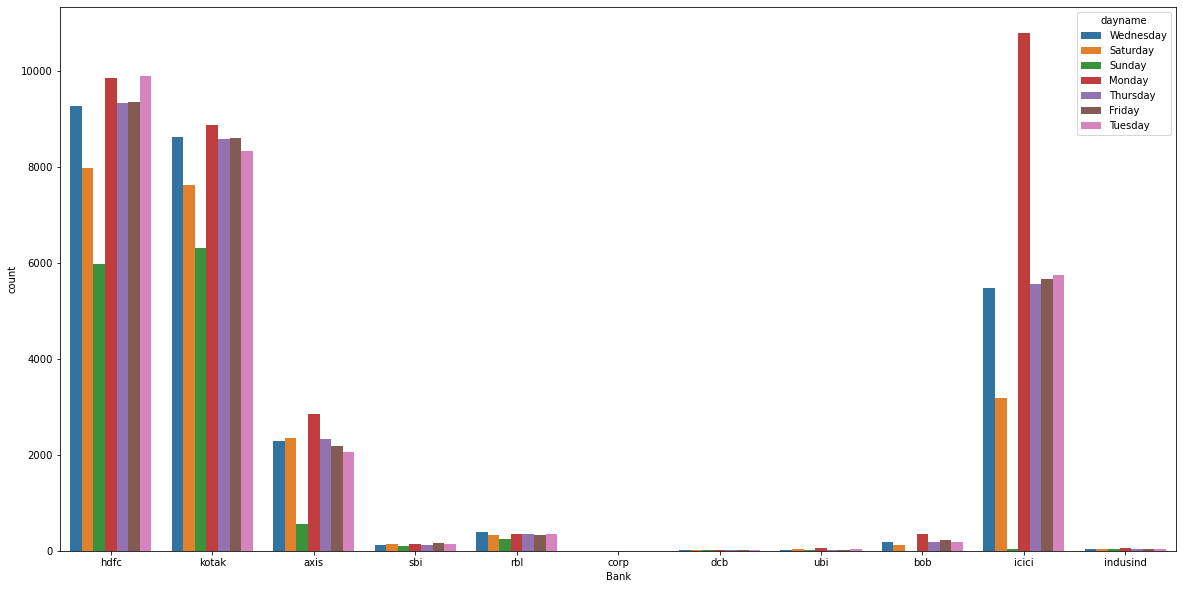

In [245]:
plt.subplots(figsize=[20,10])
x=sns.countplot(data=data,x='Bank',hue='dayname')

In [ ]:
# The banks that are working mostly on the weekdays, and les productive in the weekends.
# Mostly the transactions occur on the Monday represented by red bar,and tuesday represented by the pink bar.
# Least number of transactions occur on the sunday represented by green bar, and saturday. 

<AxesSubplot:xlabel='balance', ylabel='STATE'>

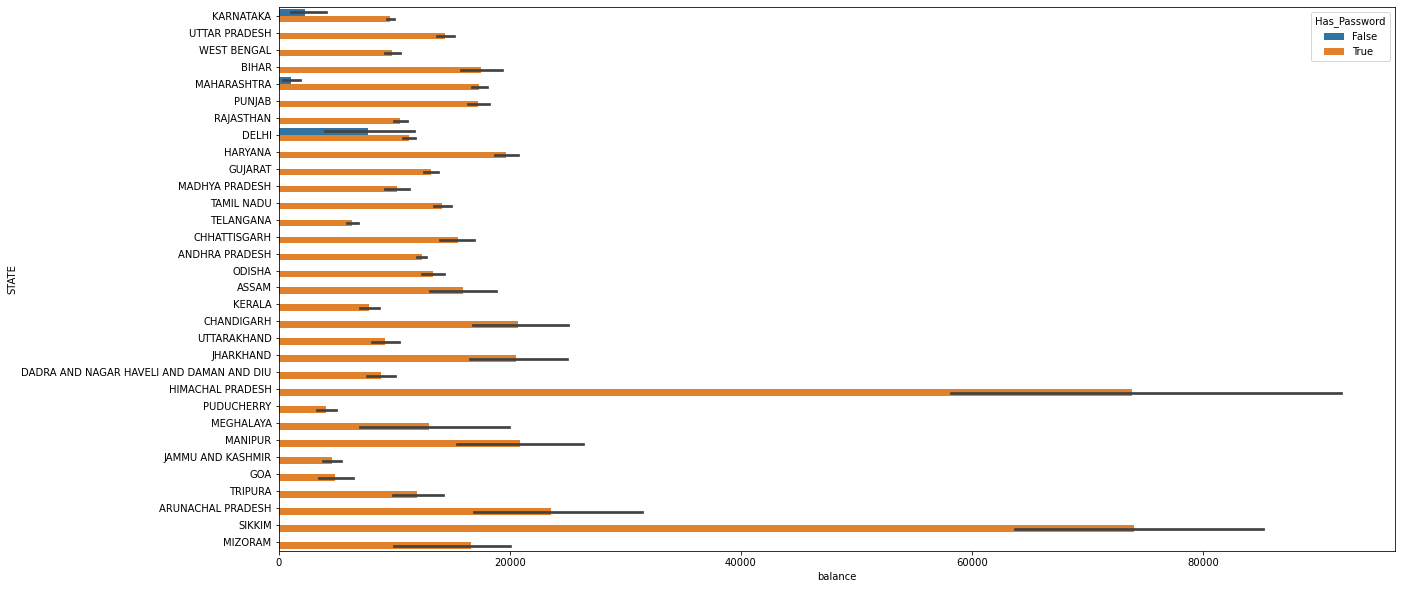

In [275]:
plt.subplots(figsize=[20,10])
sns.barplot(data=data,y='STATE',x='balance',hue='Has_Password')

In [ ]:
# this bar chart shows the variation of the balance and the State, which shows that H.P and sikkim have large amount of balance sum.
# also the hue shows that karnataka, delhi , and maharastra have few people that doesnt have password protected transactions.

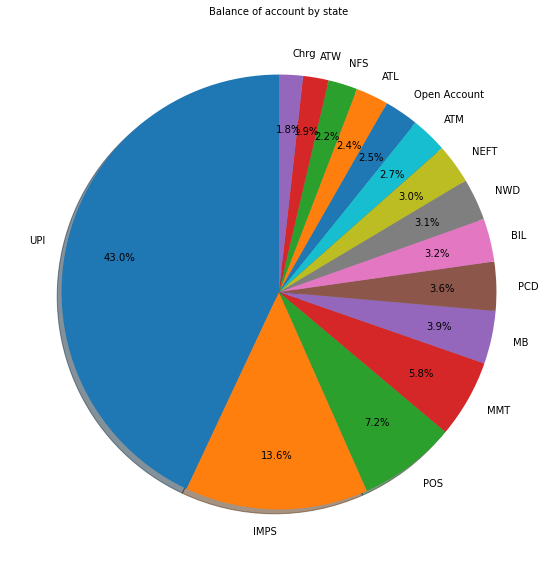

In [291]:
x=data['Transaction_type'].value_counts()[:15].sort_values(ascending=False)
import matplotlib.pyplot as plt
pie, ax = plt.subplots(figsize=[20,10])
labels = x.keys()
plt.pie(x=x, autopct="%.1f%%", labels=labels, pctdistance=0.75,shadow=True, startangle=90)
plt.title("Balance of account by state", fontsize=10);

In [ ]:
# The pie chart shows that what kind of tansactions take place in todays world, the maximum transaction that take place are 
# in form of UPI( online payment, and this why password protected column have 94% data as true), 
# The second most used transaction is IMPS(Immediate Payment Service)

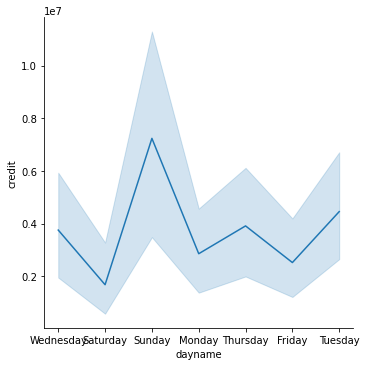

In [300]:
sns.relplot(data=data,x='dayname',y='credit',kind='line')

In [ ]:
# The lineplot shows the variation of credits with respect to particular day,
# The most number of credits are on sunday and lowest on saturday

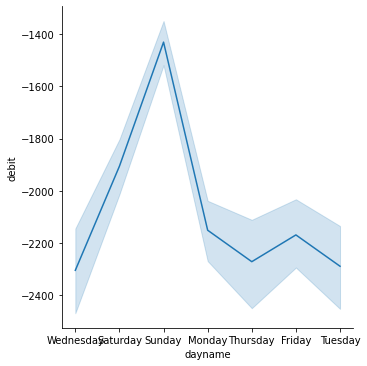

In [301]:
sns.relplot(data=data,x='dayname',y='debit',kind='line')

In [ ]:
# The lineplot shows the variation of debits with respect to particular day,
# The most number of debits are on sunday and lowest on Thursday

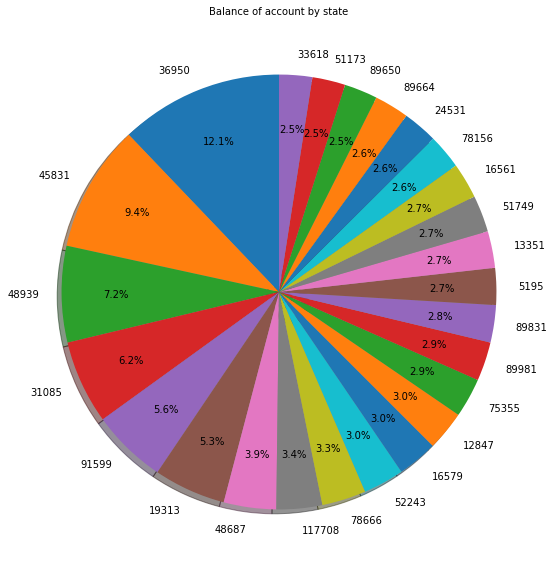

In [304]:
x=data['App_ID'].value_counts()[:25].sort_values(ascending=False)
pie, ax = plt.subplots(figsize=[20,10])
labels = x.keys()
plt.pie(x=x, autopct="%.1f%%", labels=labels, pctdistance=0.75,shadow=True, startangle=90)
plt.title("Balance of account by state", fontsize=10);

In [ ]:
# The piechart shows the activity of the top and most frequent user of the transactions.
# This percent is only based on the top 25 users the whole dataset have large number of user nearly 3000
# The most frequent user is App_ID - 3695